<a href="https://colab.research.google.com/github/abcr5914/Projects_Private/blob/main/Project_Compressor_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import math
import matplotlib.pyplot as plt

In [ ]:
'''
Notes:
  The Number of iterations : 2336 -- need to check that how
  Time Taken : 2.3 min now 1.67 min
  Need to visualize : the Pressure verses mass graph for each revolutions
  Also another code to facilitate change in temp - done
'''

'\nNotes:\n  The Number of iterations : 2336\n  Time Taken : 2.3 min\n  Need to visualize : the Pressure verses mass graph for each revolutions\n  Also another code to facilitate change in temp\n'

In [ ]:
# Constants
R = 287  # Specific gas constant for air (J/kg·K)
n = 1.4  # Polytropic index (isentropic process)
k = 25  # Heat transmission coefficient (W/m^2) (not used unless specified)
T_ambient = 293.15  # Ambient temperature (K)
P_ambient = 1e5  # Ambient pressure (Pa) ( = 1 Bar)

# Compressor and bottle parameters
D = 0.12  # Diameter of compressor cylinder (m)
h = 0.10  # Height of compressor cylinder (m)
CR = 23  # Compression ratio
RPM = 1000  # Revolutions per minute
V_bottle = 6  # Volume of the bottle (m^3)
P_bottle_start = 2e5  # Starting pressure in the bottle (Pa)
T_bottle_start = 293.15  # Starting temperature in the bottle (K)
P_bottle_final = 30e5  # Final pressure in the bottle (Pa)

In [ ]:
# Rough Estimate Calculation: To be used as a guide

# Calculate the Compressor Displacement Volume
V_s = round(math.pi * (D / 2)**2 * h, 8) # Swept volume of the compressor (m^3)
print('Compressor Displacement Volume =', V_s)

# Calculate Air Intake Volume per Minute
Q_intake = round(V_s * RPM * CR , 6)
print('Air Intake Volume per Minute =', Q_intake)

# Calculate Density of Air at Ambient Conditions
density_Air = round(P_ambient / (R * T_ambient), 4)
print('Density of Air =', density_Air)

# Calculate Mass flow Rate
mass_flow_rate = round(density_Air * Q_intake, 2)
print('Mass Flow Rate =', mass_flow_rate)

# Calculate Final Temparature
T_bottle_final = round(T_bottle_start * ((P_bottle_final / P_bottle_start) ** (round(n-1,2) / n)), 2)
print('Final Temperature =', T_bottle_final, 'K')

# Calculate Average Temparature T_avg
T_bottle_avg = round((T_bottle_start + T_bottle_final) / 2 , 2)
print('Average Temperature =', T_bottle_avg, 'K')

# Calculate Time
Time_taken = round((V_bottle * (P_bottle_final - P_bottle_start)) / (mass_flow_rate * R * T_bottle_avg) , 2)

# Output the results
print(f"Time to fill the bottle to {P_bottle_final / 1e5:.1f} bar: {Time_taken} minutes")

Compressor Displacement Volume = 0.00113097
Air Intake Volume per Minute = 26.01231
Density of Air = 1.1886
Mass Flow Rate = 30.92
Final Temperature = 635.5 K
Average Temperature = 464.32 K
Time to fill the bottle to 30.0 bar: 4.08 minutes


In [ ]:
# Derived values
N = RPM / 60  # Revolutions per second
time_step = 1 / N  # Time per revolution (s)

print('for each revolution it takes', time_step,'seconds')

for each revolution it takes 0.06 seconds


In [ ]:
# Visualization

# Arrays for plotting
time_list = []
pressure_list = []
temperature_list = []

In [ ]:
# Initialize variables
P_bottle = P_bottle_start
T_bottle = T_bottle_start
m_bottle = (P_bottle * V_bottle) / (R * T_bottle)  # Initial mass of air in the bottle (kg)
time_elapsed = 0  # Total time (s)

# Pre-calculate max cylinder pressure
P_cylinder_max = P_ambient * (CR**n)

# Simulation loop
while P_bottle < P_bottle_final:
    # Air mass delivered in this cycle
    delta_m = (P_cylinder_max - P_bottle) * V_s / (R * T_bottle)
    if delta_m < 0:
        delta_m = 0  # No reverse flow

    # Update bottle mass
    m_bottle += delta_m
    P_bottle_old = P_bottle  # Store the previous pressure for temperature calculation
    P_bottle = (m_bottle * R * T_bottle) / V_bottle

    # Update bottle temperature (assuming adiabatic process)
    T_bottle = T_bottle * (P_bottle / P_bottle_old)**((round(n-1,2) / n))

    # Update time
    time_elapsed += time_step

    # Store data for visualization
    time_list.append(time_elapsed)
    pressure_list.append(P_bottle / 1e5)  # Convert to bar for better readability
    temperature_list.append(T_bottle)

    # Heat transfer (optional: adjust T_bottle if significant heat transfer is expected)
    # For now, assuming adiabatic process; modify if needed

# Output the results
print(f"Time to fill the bottle to {P_bottle_final / 1e5:.1f} bar: {time_elapsed / 60:.2f} minutes")

Time to fill the bottle to 30.0 bar: 1.67 minutes


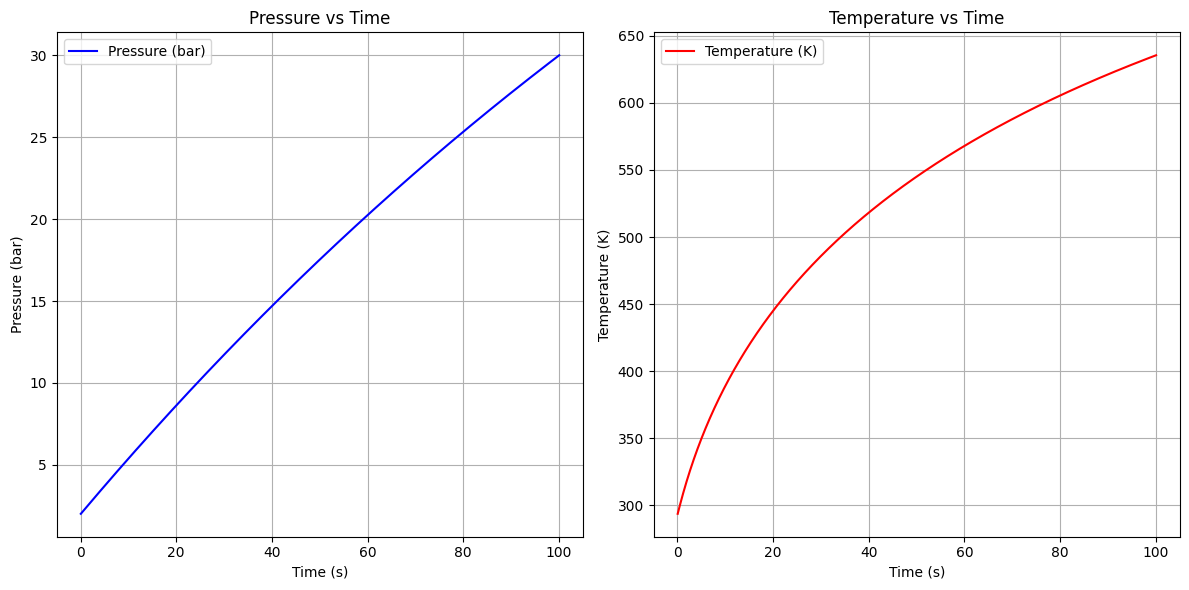

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Pressure Plot
plt.subplot(1, 2, 1)
plt.plot(time_list, pressure_list, label="Pressure (bar)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (bar)")
plt.title("Pressure vs Time")
plt.grid()
plt.legend()

# Temperature Plot
plt.subplot(1, 2, 2)
plt.plot(time_list, temperature_list, label="Temperature (K)", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Time")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()